<a href="https://colab.research.google.com/github/SeungHuiHan/Example-of-linear-regression-using-tensor-flow/blob/master/Linear_regression_model_using_tensor_flow2_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code:Linear regression model using tensor flow2_FashionMNIST

Date: 2022/02/25


Comments: SeungHui Han

In [ ]:
#인공신경망 모델 구축하고 예측 성능 관찰
#실습 데이터: 총 10가지 종류에 대한 의류 이미지를 기록한 데이터셋->의류 종류 예측
import tensorflow as tf
import matplotlib.pyplot as plt

Fashion MNIST 데이터세트

Label     Category

0         티셔츠/상의

1         바지

2         스웨터

3         드레스

4         코트

5         샌들

6         셔츠

7         운동화

8         가방

9         부츠

In [ ]:
# Fashion MNIST 데이터셋 로딩
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [ ]:
train_X.shape#28x28픽셀로 표현된 60000개의 train 샘플

(60000, 28, 28)

In [ ]:
test_X.shape#28x28픽셀로 표현된 10000개의 train 샘플

(10000, 28, 28)

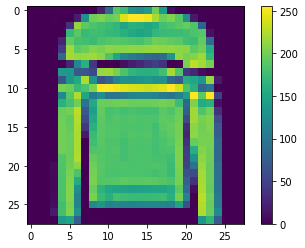

In [ ]:
#픽셀 값의 범위가 0~255 사이인것을 알 수 있음
plt.figure()
plt.imshow(train_X[5])
plt.colorbar()
plt.grid(False)
plt.show()

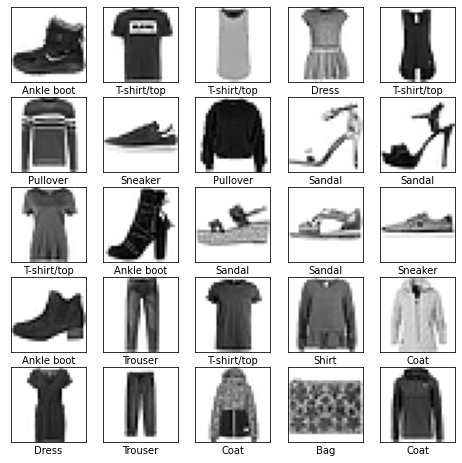

In [ ]:
#train set에서 처음 25개 이미지와 그 아래 클래스 이름을 출력
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_Y[i]])
plt.show()

In [ ]:
#신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정
# 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

In [ ]:
#Fashion MNIST 분류 DNN 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='softmax')
])

# 모델 학습 과정 설정
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
Total params: 116,992
Trainable params: 116,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# DNN 모델 학습
history = model.fit(train_X, train_Y, epochs=50,batch_size=32, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')],validation_split=0.25,verbose=1)
#callbacks.EarlyStopping:모델을 더 이상 학습을 못할 경우(loss, metric등의 개선이 없을 경우), 학습 도중 미리 학습을 종료
# verbose : 학습 중 출력되는 문구를 설정한다.
# 0 : 아무 것도 출력하지 않는다.
# 1 : 훈련의 진행도를 보여주는 진행 막대를 보여준다.
# 2 : 미니 배치마다 손실 정보를 출력한다.

Epoch 1/50
1407/1407 [==============================] - 9s 5ms/step - loss: 1.7909 - accuracy: 0.4682 - val_loss: 1.0188 - val_accuracy: 0.6786
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8381 - accuracy: 0.7200 - val_loss: 0.7127 - val_accuracy: 0.7497
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6680 - accuracy: 0.7629 - val_loss: 0.6303 - val_accuracy: 0.7776
Epoch 4/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6030 - accuracy: 0.7832 - val_loss: 0.5822 - val_accuracy: 0.7906
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5624 - accuracy: 0.8002 - val_loss: 0.5477 - val_accuracy: 0.8041
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5340 - accuracy: 0.8102 - val_loss: 0.5254 - val_accuracy: 0.8130
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5119 - accuracy: 0.8190 - val_loss: 0.5118 - val_accuracy:

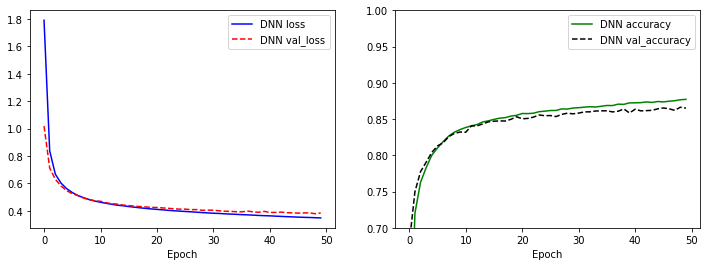

In [ ]:
#회귀 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='DNN loss')
plt.plot(history.history['val_loss'], 'r--', label='DNN val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='DNN accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='DNN val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
#val이 위로 오버피팅, val이 아래로 언더 피팅

In [ ]:
# DNN Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8539


[0.4103340208530426, 0.8539000153541565]

In [ ]:
#CNN 모델
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Fashion MNIST 데이터셋 로딩
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X1, train_Y1), (test_X1, test_Y1) = fashion_mnist.load_data()

In [ ]:
#신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정
# 정규화
train_X1 = train_X1 / 255.0
test_X1 = test_X1 / 255.0

In [ ]:
# 이미지는 보통 채널을 가지고 있다(컬러 이미지는 RGB의 3채널, 흑백 이미지는 1채널)
#  Conv2D레이어는 채널을 가진 형태의 데이터를 받도록 기본적으로 설정되어 있기 때문에 채널을 갖도록 데이터의 Shape를 바꿔준다.

# reshape 이전
print(train_X1.shape, test_X1.shape)

train_X1 = train_X1.reshape(-1, 28, 28, 1)
test_X1 = test_X1.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X1.shape, test_X1.shape)

#Fashion MNIST데이터를 구성하는 흑백 이미지는 1개의 채널을 갖기 때문에
# reshape() 함수를 사용해 데이터의 가장 뒤쪽에 채널 차원을 추가한다. 데이터 수는 달라지지 않음

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


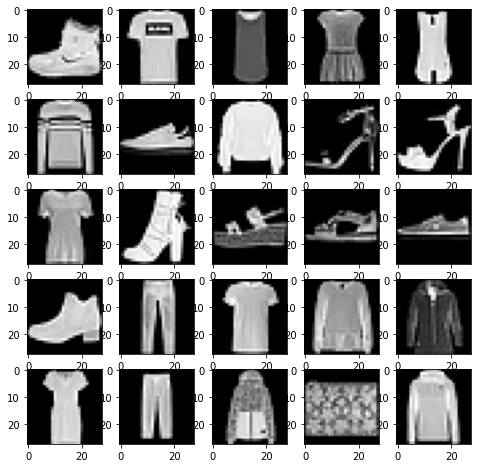

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4]


In [ ]:
# 데이터 시각화
plt.figure(figsize=(8, 8))
for c in range(25): 
  
  plt.subplot(5,5,c+1)
  plt.imshow(train_X1[c].reshape(28,28), cmap='gray')

plt.show()

# 훈련 데이터의 1~25번째 까지의 라벨 프린트
print(train_Y1[:25])

In [ ]:
# Fashion MNIST 분류를 위한 CNN 모델 정의
model = Sequential([
    # 특징 추출기 (Feature Extractor)
    Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32),#28*28픽셀을 1차원으로 계산 # kernel_size : 연산을 수행할 때 윈도우의 크기를 의미
    MaxPool2D(strides=(2, 2)),
    Dropout(rate=0.3),                                               #filters : 몇 개의 다른 종류의 필터를 활용할 것인지를 나타냄. 출력 모양의 깊이(depth) 를 결정
    Conv2D(kernel_size=(3, 3), filters=64),                          #strides : 연산을 수행할 때 윈도우가 가로 그리고 세로로 움직이면서 내적 연산을 수행하는데, 한 번에 얼마나 움직일지를 의미(디폴트 = 1)
    MaxPool2D(strides=(2, 2)),
    Dropout(rate=0.3),
    Conv2D(kernel_size=(3, 3), filters=128),
    MaxPool2D(strides=(2, 2)),
    Dropout(rate=0.3),
    # 다차원 이미지 => 1차원
    Flatten(), # Flattn은 3차원 배열(가로,세로,컬러)인 이미지를 1차원 배열로 바꿔준다.
    # 분류기 (Classifier)
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    # Dense(units=128, activation='relu'),
    Dropout(rate=0.3),  # Dropout()는 특정 노드에 학습이 지나치게 몰리는 것을 방지하기 위해 랜덤하게 일부 노드를 꺼준다.
    Dense(units=10, activation='softmax') #softmax함수: 다중 클래스 분류 문제에서 출력층에 주로 쓰인다.
])

# 모델 학습 과정 설정
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
#필터 개수는  아래 param으로 판단

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [ ]:
# CNN모델 학습
history = model.fit(train_X1, train_Y1, epochs=50,batch_size=32, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')],validation_split=0.25,verbose=1)
#callbacks.EarlyStopping:모델을 더 이상 학습을 못할 경우(loss, metric등의 개선이 없을 경우), 학습 도중 미리 학습을 종료
# verbose : 학습 중 출력되는 문구를 설정한다.
# 0 : 아무 것도 출력하지 않는다.
# 1 : 훈련의 진행도를 보여주는 진행 막대를 보여준다.
# 2 : 미니 배치마다 손실 정보를 출력한다.

Epoch 1/50
1407/1407 [==============================] - 13s 9ms/step - loss: 0.7417 - accuracy: 0.7272 - val_loss: 0.5217 - val_accuracy: 0.8013
Epoch 2/50
1407/1407 [==============================] - 12s 8ms/step - loss: 0.5208 - accuracy: 0.8142 - val_loss: 0.4213 - val_accuracy: 0.8445
Epoch 3/50
1407/1407 [==============================] - 12s 8ms/step - loss: 0.4658 - accuracy: 0.8323 - val_loss: 0.4214 - val_accuracy: 0.8470
Epoch 4/50
1407/1407 [==============================] - 14s 10ms/step - loss: 0.4376 - accuracy: 0.8394 - val_loss: 0.4064 - val_accuracy: 0.8535
Epoch 5/50
1407/1407 [==============================] - 12s 9ms/step - loss: 0.4196 - accuracy: 0.8482 - val_loss: 0.3673 - val_accuracy: 0.8625
Epoch 6/50
1407/1407 [==============================] - 12s 9ms/step - loss: 0.4091 - accuracy: 0.8507 - val_loss: 0.3602 - val_accuracy: 0.8669
Epoch 7/50
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3988 - accuracy: 0.8569 - val_loss: 0.3569 - val_

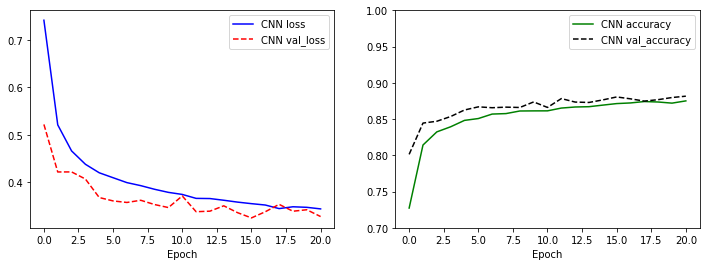

In [ ]:
#회귀 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='CNN loss')
plt.plot(history.history['val_loss'], 'r--', label='CNN val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='CNN accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='CNN val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
#val이 위로 오버피팅, val이 아래로 언더 피팅

In [ ]:
# CNN 모델 평가
print(model.evaluate(test_X1, test_Y1, verbose=0))

[0.33577096462249756, 0.8763999938964844]
